In [1]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
november = pd.read_csv("C:\\Users\spanddhana\\Desktop\\AIR_POLLUTION\\IIIT-AIRVEDA CALIBERATION\\nov_final.csv")

In [3]:
november

,Unnamed: 0,timestamp,PM2.5,PM10,NO2,CO,Ozone,Temp,RH,pm25_air,pm10_air,co_air,no2_air
0,1,01-11-2020 01:00,74.75,168.50,39.92,0.53,61.38,29.40,62.50,79.5,123.0,2.0,50.405
1,2,01-11-2020 02:00,76.75,151.50,37.65,0.48,57.85,29.42,65.00,79.5,119.0,2.0,49.660
2,3,01-11-2020 03:00,67.50,132.25,36.92,0.46,52.95,29.47,67.50,82.0,120.0,2.0,49.335
3,4,01-11-2020 04:00,69.50,137.75,36.98,0.45,52.25,29.80,68.00,81.5,123.5,2.0,46.320
4,5,01-11-2020 05:00,72.00,147.25,35.65,0.56,42.98,29.38,72.25,87.0,124.5,2.0,44.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,792,30-11-2020 19:00,31.00,80.25,31.12,0.53,38.52,29.20,74.00,51.5,89.5,2.0,49.525
792,793,30-11-2020 20:00,49.00,104.00,76.92,1.25,4.45,29.20,73.75,62.5,117.0,2.0,51.705
793,794,30-11-2020 21:00,83.50,172.75,92.80,1.90,1.25,29.25,71.25,83.5,142.5,2.0,52.935
794,795,30-11-2020 22:00,80.25,176.00,91.62,2.00,2.40,29.30,73.50,94.5,156.0,2.5,52.200


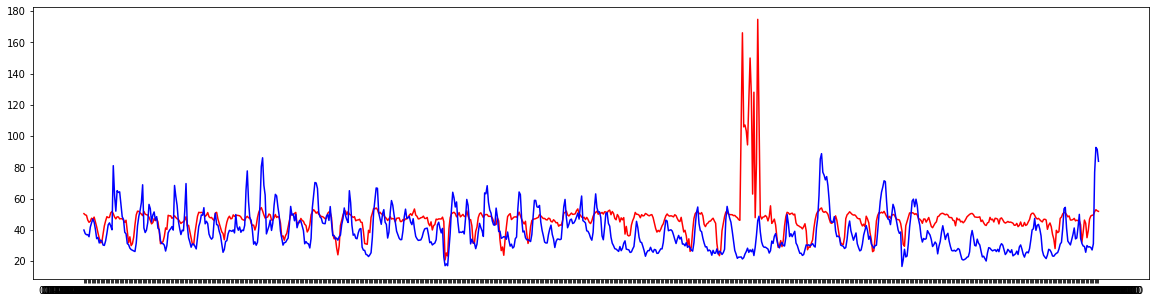

In [5]:
x = november['timestamp']
y1 = november['no2_air']
y2 = november['NO2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.show()


max correlation is at lag -61


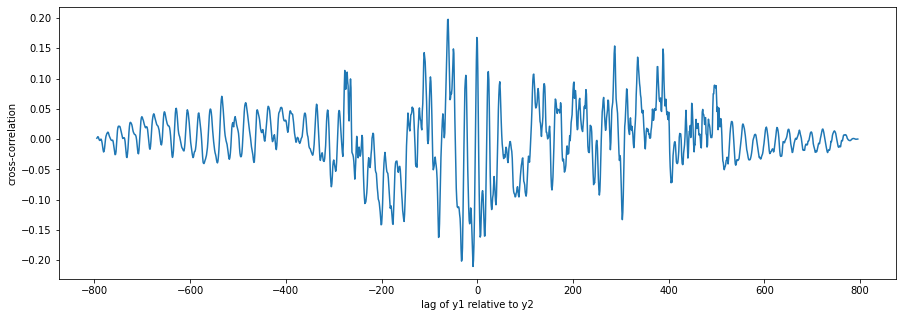

In [6]:
npts = len(november)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

In [7]:
november = november[november['no2_air'] < 100]

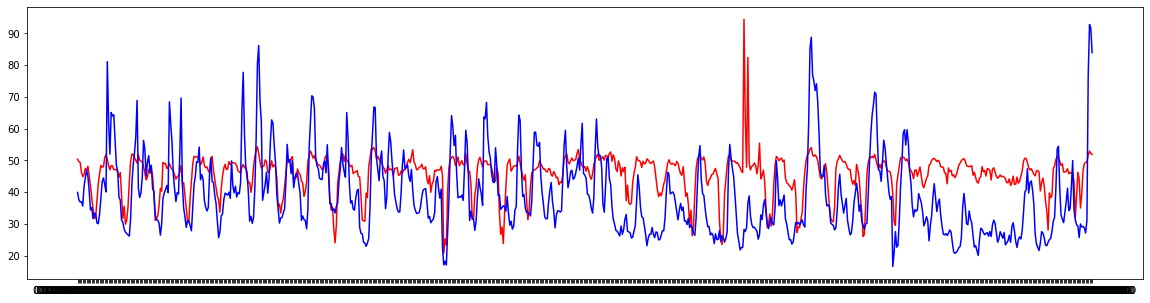

In [8]:
x = november['timestamp']
y1 = november['no2_air']
y2 = november['NO2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.show()


max correlation is at lag 0
max correlation is  0.451


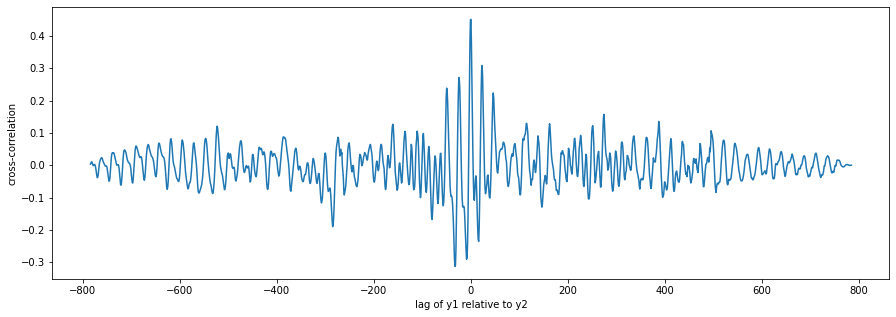

In [9]:
npts = len(november)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))

In [10]:
corr, _ = pearsonr(y1, y2) 
print('Pearsons correlation: %.3f' % corr) 

Pearsons correlation: 0.451


In [11]:
mean_squared_error(november['no2_air'], november['NO2'])

166.62623318471339

In [12]:
mean_absolute_error(november['no2_air'], november['NO2'])

10.54152866242038

In [40]:
msk = (np.random.rand(len(november)) > 0.8)
train = november[msk]
test = november[~msk]
regr = linear_model.LinearRegression()
train_t = np.asanyarray(train[['timestamp']])
train_x = np.asanyarray(train[['no2_air']])
train_y = np.asanyarray(train[['NO2']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_t = np.asanyarray(test[['timestamp']])
test_x = np.asanyarray(test[['no2_air']])
test_y = np.asanyarray(test[['NO2']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

Coefficients:  [[1.23018026]]
Intercept:  [-15.92736777]
R2  0.10925939298723875
MAE  8.533144030451341
MSE  124.89770408257604
RMSE  11.17576413864287
variance score = 0.13475731867951724


In [39]:
train_t = np.asanyarray(train[['timestamp']])
train_x = np.asanyarray(train[['no2_air', 'pm10_air']])
train_y = np.asanyarray(train[['NO2']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_t = np.asanyarray(test[['timestamp']])
test_x = np.asanyarray(test[['no2_air', 'pm10_air']])
test_y = np.asanyarray(test[['NO2']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

Coefficients:  [[0.52910849 0.14927314]]
Intercept:  [-1.01400773]
R2  0.3377629051029135
MAE  7.224952712812386
MSE  101.74744071682707
RMSE  10.086993641161229
variance score = 0.33877198049829726


In [38]:
train_t = np.asanyarray(train[['timestamp']])
train_x = np.asanyarray(train[['no2_air', 'RH']])
train_y = np.asanyarray(train[['NO2']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_t = np.asanyarray(test[['timestamp']])
test_x = np.asanyarray(test[['no2_air', 'RH']])
test_y = np.asanyarray(test[['NO2']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

Coefficients:  [[ 0.81162089 -0.10009591]]
Intercept:  [7.54304723]
R2  0.22504396234054225
MAE  7.860616729196803
MSE  119.06580604965413
RMSE  10.911727913105885
variance score = 0.2272466478661752


In [37]:
train_t = np.asanyarray(train[['timestamp']])
train_x = np.asanyarray(train[['no2_air', 'CO']])
train_y = np.asanyarray(train[['NO2']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_t = np.asanyarray(test[['timestamp']])
test_x = np.asanyarray(test[['no2_air', 'CO']])
test_y = np.asanyarray(test[['NO2']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

Coefficients:  [[ 0.12683963 39.83470371]]
Intercept:  [10.88274186]
R2  0.7087465993370188
MAE  5.24495264381708
MSE  44.74875893525145
RMSE  6.689451317952127
variance score = 0.7096484936735998


In [35]:
train_t = np.asanyarray(train[['timestamp']])
train_x = np.asanyarray(train[['no2_air', 'Ozone']])
train_y = np.asanyarray(train[['NO2']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_t = np.asanyarray(test[['timestamp']])
test_x = np.asanyarray(test[['no2_air', 'Ozone']])
test_y = np.asanyarray(test[['NO2']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

Coefficients:  [[ 0.5650988  -0.09179835]]
Intercept:  [17.06677544]
R2  0.24206946721774658
MAE  8.054222991708917
MSE  116.44997319837508
RMSE  10.79119887678728
variance score = 0.24649512194947087


In [34]:
train_t = np.asanyarray(train[['timestamp']])
train_x = np.asanyarray(train[['no2_air','CO', 'RH']])
train_y = np.asanyarray(train[['NO2']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_t = np.asanyarray(test[['timestamp']])
test_x = np.asanyarray(test[['no2_air', 'CO', 'RH']])
test_y = np.asanyarray(test[['NO2']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

Coefficients:  [[ 0.25017814 40.68754592 -0.16050143]]
Intercept:  [14.86172994]
R2  0.7304432742604374
MAE  4.957998844901801
MSE  41.41523811237173
RMSE  6.435467202338283
variance score = 0.7309386295386688


In [33]:
train_t = np.asanyarray(train[['timestamp']])
train_x = np.asanyarray(train[['no2_air','CO', 'RH','Ozone', 'pm10_air']])
train_y = np.asanyarray(train[['NO2']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_t = np.asanyarray(test[['timestamp']])
test_x = np.asanyarray(test[['no2_air', 'CO', 'RH', 'Ozone', 'pm10_air']])
test_y = np.asanyarray(test[['NO2']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

Coefficients:  [[ 0.19797246 27.1818756  -0.60144095 -0.27545816  0.10940675]]
Intercept:  [54.79207919]
R2  0.8525090182652202
MAE  3.644500572109461
MSE  22.660811416277195
RMSE  4.76033732169026
variance score = 0.854115277015608


In [32]:
train_t = np.asanyarray(train[['timestamp']])
train_x = np.asanyarray(train[['no2_air','co_air', 'RH','Ozone', 'pm10_air']])
train_y = np.asanyarray(train[['NO2']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_t = np.asanyarray(test[['timestamp']])
test_x = np.asanyarray(test[['no2_air', 'co_air', 'RH', 'Ozone', 'pm10_air']])
test_y = np.asanyarray(test[['NO2']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

Coefficients:  [[ 0.38923094  0.50156115 -0.85262066 -0.44730435  0.19820217]]
Intercept:  [75.06202547]
R2  0.6969435979081274
MAE  4.935376701669851
MSE  46.56219584088625
RMSE  6.8236497448862545
variance score = 0.7007943588616632


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

X = november['no2_air']
y = november['NO2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0) 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X.values.reshape(-1,1), y.values.reshape(-1,1)) 
y_pred = regressor.predict(X_test.values.reshape(-1,1))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted_train = regressor.predict(X_train.values.reshape(-1,1))
predicted_test = regressor.predict(X_test.values.reshape(-1,1))
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Mean Absolute Error: 3.779954360119048
Mean Squared Error: 28.34198652043306
Root Mean Squared Error: 5.323719237566258
Test data R-2 score: 0.841
Test data Spearman correlation: 0.916
Test data Pearson correlation: 0.924


C:\Users\spanddhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 3.367125109373994
Mean Squared Error: 24.188558881819407
Root Mean Squared Error: 4.918186544024068


In [28]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
X = november[['no2_air', 'CO']]
y = november['NO2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0) 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X.values.reshape(-1,2), y.values.reshape(-1,1)) 
y_pred = regressor.predict(X_test.values.reshape(-1,2))


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted_train = regressor.predict(X_train)
predicted_test = regressor.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Mean Absolute Error: 2.155128125
Mean Squared Error: 8.6919587390625
Root Mean Squared Error: 2.9482128042362374
Test data R-2 score: 0.951
Test data Spearman correlation: 0.975
Test data Pearson correlation: 0.977


C:\Users\spanddhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 2.155128125
Mean Squared Error: 8.6919587390625
Root Mean Squared Error: 2.9482128042362374


In [27]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
X = november[['no2_air', 'CO', 'RH']]
y = november['NO2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0) 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X.values.reshape(-1,3), y.values.reshape(-1,1)) 
y_pred = regressor.predict(X_test.values.reshape(-1,3))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted_train = regressor.predict(X_train)
predicted_test = regressor.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Mean Absolute Error: 2.002731249999999
Mean Squared Error: 7.626097531249999
Root Mean Squared Error: 2.761538978767093
Test data R-2 score: 0.957
Test data Spearman correlation: 0.976
Test data Pearson correlation: 0.98


C:\Users\spanddhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [26]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
X = november[['no2_air', 'CO', 'RH', 'Ozone']]
y = november['NO2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0) 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X.values.reshape(-1,4), y.values.reshape(-1,1)) 
y_pred = regressor.predict(X_test.values.reshape(-1,4))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted_train = regressor.predict(X_train)
predicted_test = regressor.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Mean Absolute Error: 1.7237062500000004
Mean Squared Error: 5.660569418750001
Root Mean Squared Error: 2.3791951199407753
Test data R-2 score: 0.968
Test data Spearman correlation: 0.983
Test data Pearson correlation: 0.986


C:\Users\spanddhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


In [34]:
X = november[['no2_air', 'CO', 'RH', 'Ozone', 'pm10_air', 'Temp']]
y = november['NO2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0) 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X.values.reshape(-1,6), y.values.reshape(-1,1)) 
y_pred = regressor.predict(X_test.values.reshape(-1,6))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted_train = regressor.predict(X_train)
predicted_test = regressor.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Mean Absolute Error: 1.7026374999999998
Mean Squared Error: 5.425480237499997
Root Mean Squared Error: 2.329266029782772
Test data R-2 score:  0.97
Test data Spearman correlation: 0.986
Test data Pearson correlation: 0.986


C:\Users\spanddhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [37]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [40]:
mean_absolute_percentage_error(y_test, predicted_test)

4.615702246307082